# Overview Results


In [1]:
import matplotlib.pyplot as plt

from scripts.viz_utils import *
from scripts.utils import get_question_statement

data = pd.read_csv('../data/data_scales.csv', index_col='ResponseId')

scale_titles = {
    'ati': 'Affinity for Technology Interaction',
    'hcsds_c': 'Healthcare Trust - Competence',
    'hcsds_v': 'Healthcare Trust - Values',
    'tia_rc': 'TiA - Reliability/Confidence',
    'tia_up': 'TiA - Understanding/Predictability',
    'tia_f': 'TiA - Familiarity',
    'tia_pro': 'TiA - Propensity to Trust',
    'tia_t': 'TiA - Trust in Automation'
}

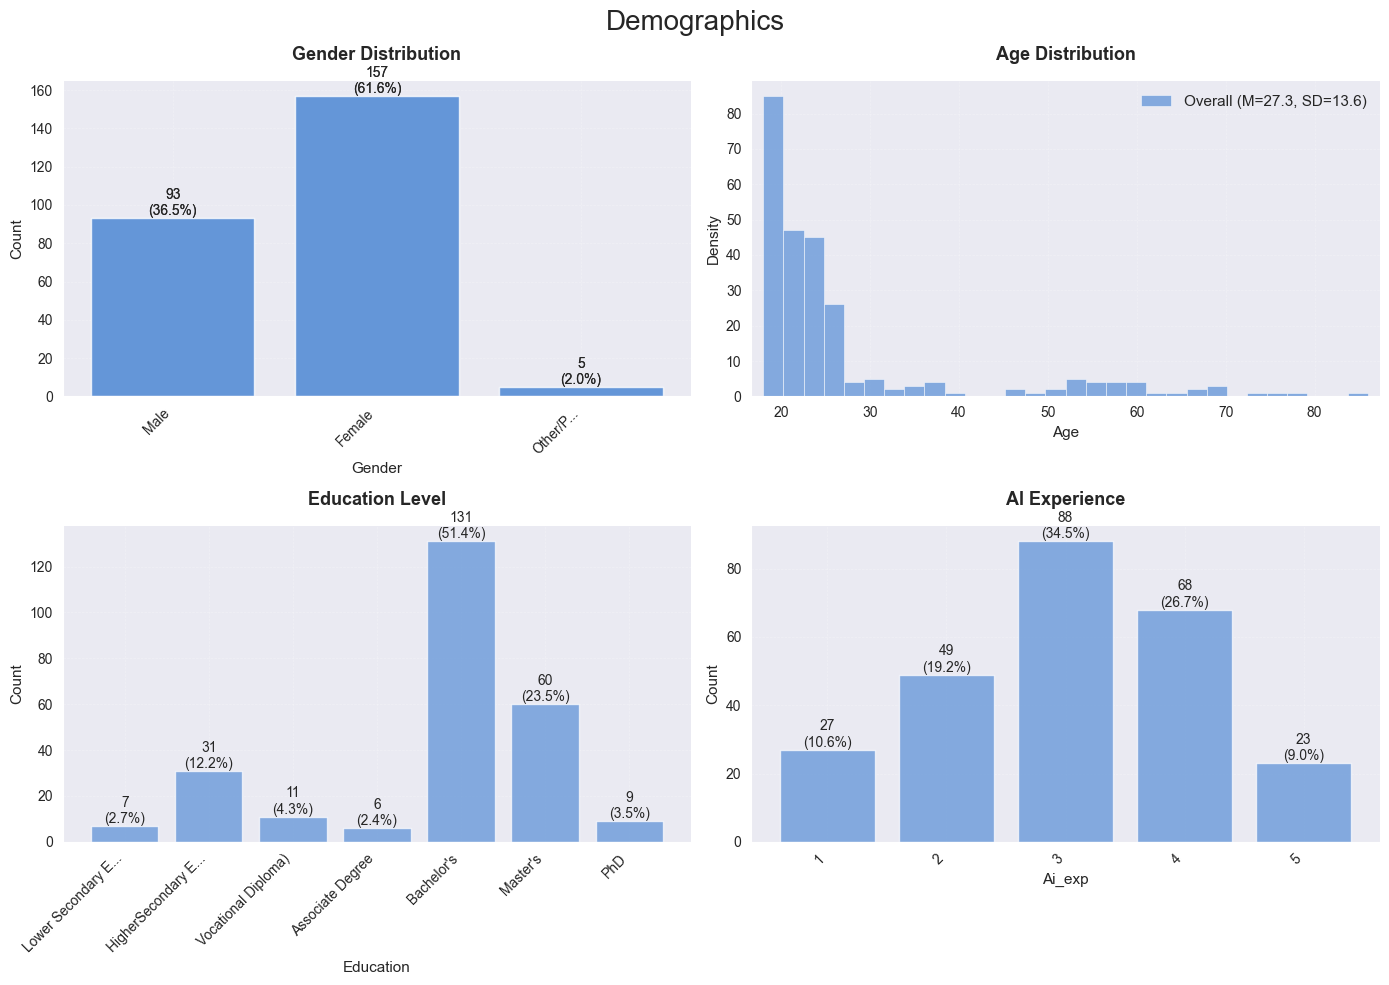

In [2]:
# Demographics
fig, axes = create_figure_grid(4, ncols=2, figsize=(14, 10))
plot_categorical_bar(data, 'gender', title='Gender Distribution', ax=axes[0], trunc=10)

plot_categorical_bar(data, 'gender', title='Gender Distribution', ax=axes[0], trunc=10)
plot_continuous_distribution(data, 'age', title='Age Distribution', ax=axes[1])
plot_categorical_bar(data, 'education', title='Education Level', ax=axes[2])
plot_categorical_bar(data, 'ai_exp', title='AI Experience', ax=axes[3])

fig.suptitle("Demographics", fontsize=20)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'AI Experience by Gender'}, xlabel='Ai_exp', ylabel='Count'>

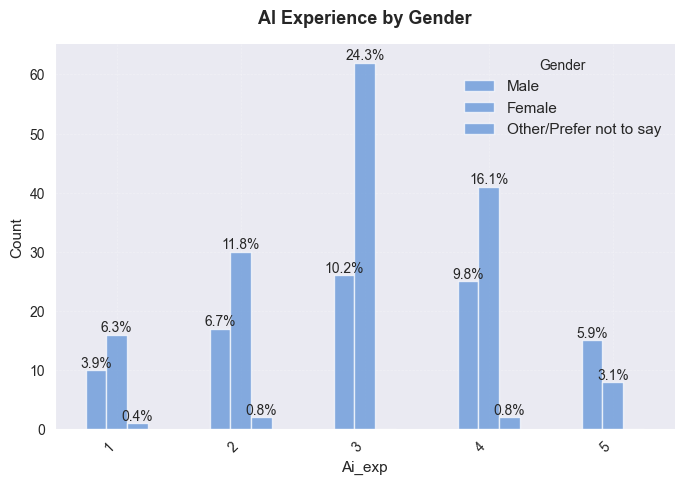

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_categorical_bar(data, 'ai_exp', group_by='gender',
                     title='AI Experience by Gender',
                     test_method='nonparametric',
                     ax=ax, trunc=10, show_absolute=False)


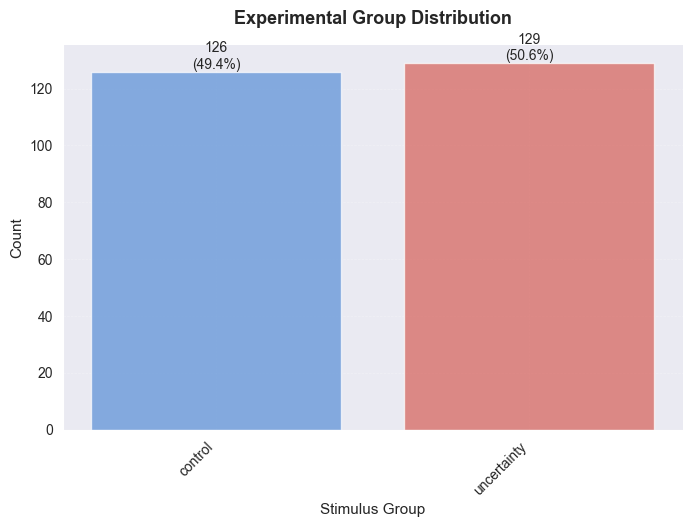

In [4]:
# distribution over experimental groups
fig, ax = plt.subplots(figsize=(8, 5))

# Get value counts for stimulus_group
counts = data['stimulus_group'].value_counts().sort_index()

# Get readable labels
from scripts.viz_utils import get_readable_labels
x_labels = get_readable_labels('stimulus_group', counts.index.tolist(), trunc=20)

# Create manual color mapping using the same colors as the grouped plots
colors = ['#578ED6', '#D65F57']  # Blue for control (0), Pink for uncertainty (1)

# Plot bars with custom colors
bars = ax.bar(range(len(counts)), counts.values, color=colors,
             alpha=0.7, edgecolor='white', linewidth=1)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Add percentage labels
for i, (bar, count) in enumerate(zip(bars, counts.values)):
    height = bar.get_height()
    percentage = count / counts.sum() * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{count:.0f}\n({percentage:.1f}%)',
           ha='center', va='bottom', fontsize=10)

# Apply styling
from scripts.viz_utils import apply_consistent_style
apply_consistent_style(ax, title='Experimental Group Distribution',
                      xlabel='Stimulus Group', ylabel='Count')

plt.show()


Statistical Test Results for 'gender':
  Group Sample Sizes:
    control: n = 126
    uncertainty: n = 129
  Test: Chi-square test of independence
  Result: χ²(2) = 1.92, p = .383, V = 0.09
  Interpretation: not significant (p ≥ .05)


Statistical Test Results for 'age':
  Group Descriptive Statistics:
    uncertainty: n = 129, M = 27.72, SD = 14.06
    control: n = 126, M = 26.96, SD = 13.17
  Test: Independent samples t-test (Welch's)
  Result: t(252.6) = 0.45, p = .656, d = 0.06
  Interpretation: not significant (p ≥ .05)


Statistical Test Results for 'education':
  Group Sample Sizes:
    control: n = 126
    uncertainty: n = 129
  Test: Chi-square test of independence
  Result: χ²(6) = 5.30, p = .506, V = 0.14
  Interpretation: not significant (p ≥ .05)


Statistical Test Results for 'ai_exp':
  Group Sample Sizes:
    control: n = 126
    uncertainty: n = 129
  Test: Chi-square test of independence
  Result: χ²(4) = 7.25, p = .123, V = 0.17
  Interpretation: not significant (p 

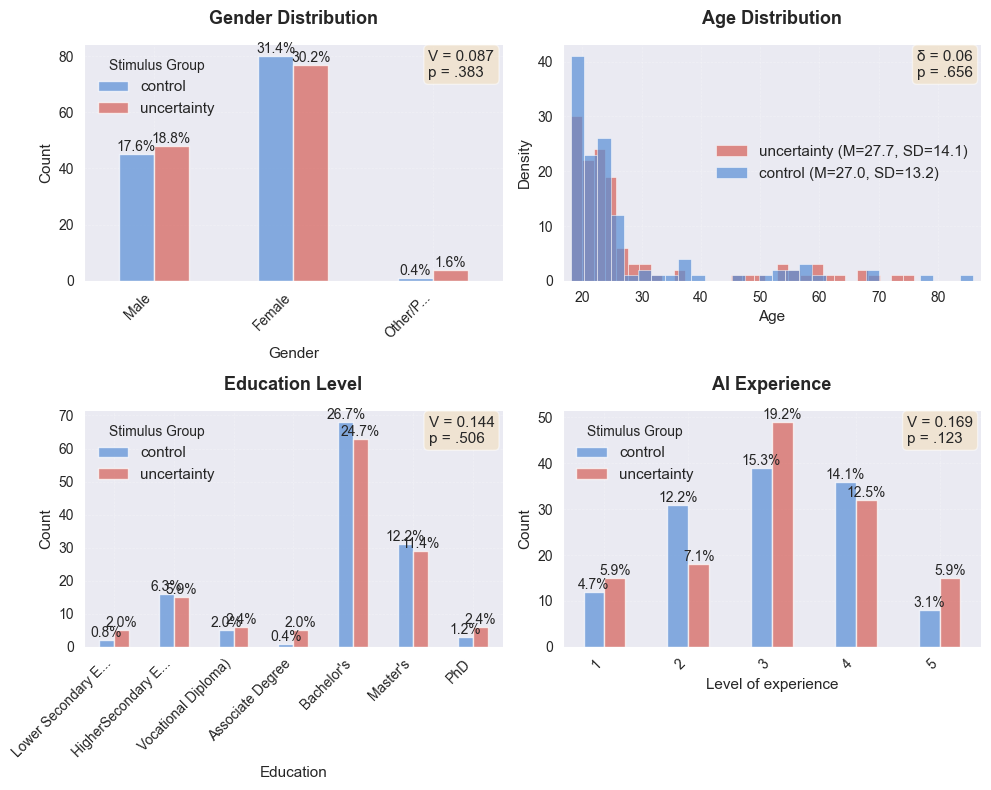

In [5]:
# Demographics per group
fig, axes = create_figure_grid(4, ncols=2, figsize=(10, 8))

plot_categorical_bar(data, 'gender',
                     group_by='stimulus_group',
                     title='Gender Distribution',
                     test_method='nonparametric',
                     ax=axes[0], trunc=10, show_absolute=False)

plot_continuous_distribution(data, 'age',
                             group_by='stimulus_group',
                             title='Age Distribution',
                             test_method='parametric',
                             ax=axes[1])

plot_categorical_bar(data, 'education',
                     group_by='stimulus_group',
                     title='Education Level',
                     test_method='nonparametric',
                     ax=axes[2], show_absolute=False)

plot_categorical_bar(data, 'ai_exp', group_by='stimulus_group',
                     title='AI Experience',
                     test_method='nonparametric',
                     x_label='Level of experience',
                     ax=axes[3], show_absolute=False)

#fig.suptitle("Demographics by group", fontsize=20)

plt.tight_layout()
plt.savefig(f'../plots/overview/demographics_by_group.png', transparent=True)
plt.show()


Statistical Test Results for 'ati':
  Group Descriptive Statistics:
    uncertainty: n = 129, M = 2.86, SD = 0.78
    control: n = 126, M = 2.92, SD = 0.84
  Test: Independent samples t-test (Welch's)
  Result: t(250.6) = -0.53, p = .593, d = 0.07
  Interpretation: not significant (p ≥ .05)


Statistical Test Results for 'hcsds_c':
  Group Descriptive Statistics:
    uncertainty: n = 129, M = 3.49, SD = 0.73
    control: n = 126, M = 3.58, SD = 0.64
  Test: Independent samples t-test (Welch's)
  Result: t(250.0) = -1.01, p = .313, d = 0.13
  Interpretation: not significant (p ≥ .05)


Statistical Test Results for 'hcsds_v':
  Group Descriptive Statistics:
    uncertainty: n = 129, M = 3.16, SD = 0.66
    control: n = 126, M = 3.15, SD = 0.70
  Test: Independent samples t-test (Welch's)
  Result: t(251.5) = 0.05, p = .961, d = 0.01
  Interpretation: not significant (p ≥ .05)



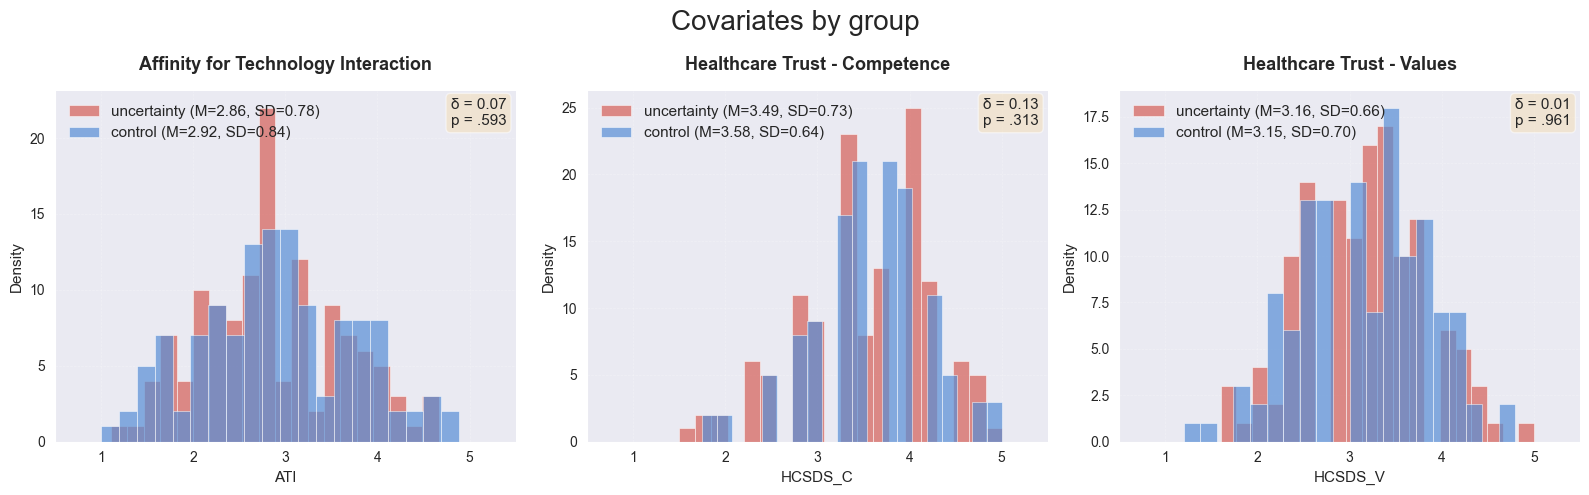

In [6]:
# Covariates
fig, axes = create_figure_grid(3, ncols=3, figsize=(16, 5))

cov_scales = ['ati', 'hcsds_c', 'hcsds_v']

for idx, scale in enumerate(cov_scales):
    plot_likert_distribution(data, scale, title=scale_titles.get(scale),
                        group_by='stimulus_group', ax=axes[idx], show_bars=True, show_kde=False)

fig.suptitle("Covariates by group", fontsize=20)

plt.tight_layout()
plt.show()


Statistical Test Results for 'manip_check1_1':
  Group Descriptive Statistics:
    uncertainty: n = 129, M = 2.19, SD = 1.10
    control: n = 126, M = 2.30, SD = 1.26
  Test: Independent samples t-test (Welch's)
  Result: t(246.6) = -0.73, p = .468, d = 0.09
  Interpretation: not significant (p ≥ .05)


Statistical Test Results for 'manip_check1_2':
  Group Descriptive Statistics:
    uncertainty: n = 129, M = 3.34, SD = 0.98
    control: n = 126, M = 4.02, SD = 1.00
  Test: Independent samples t-test (Welch's)
  Result: t(252.4) = -5.43, p < .001, d = 0.68
  Interpretation: highly significant (p < .001)


Statistical Test Results for 'manip_check1_3':
  Group Descriptive Statistics:
    uncertainty: n = 129, M = 3.20, SD = 1.25
    control: n = 126, M = 3.85, SD = 1.03
  Test: Independent samples t-test (Welch's)
  Result: t(246.2) = -4.53, p < .001, d = 0.57
  Interpretation: highly significant (p < .001)


Statistical Test Results for 'manip_check1_4':
  Group Descriptive Statistic

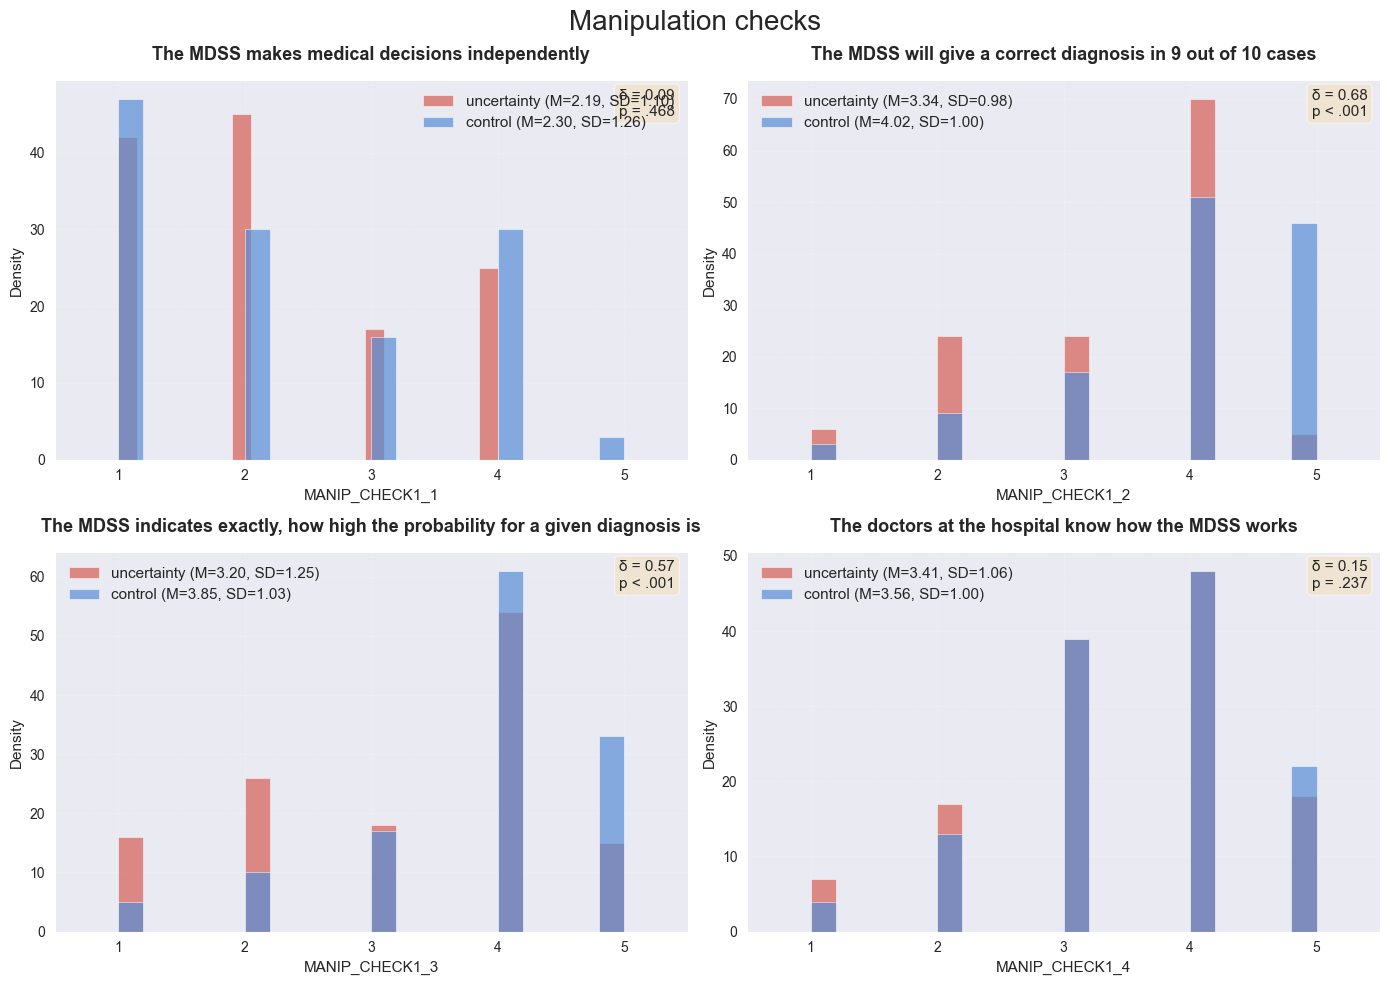

In [7]:
# Manipulation check
manip_check_scales = []
for i in range(4):
    manip_check_scales.append(f'manip_check1_{i+1}')

fig, axes = create_figure_grid(4, ncols=2, figsize=(14, 10))

for (i, scale) in enumerate(manip_check_scales):
    plot_likert_distribution(data, scale, title=get_question_statement(scale), group_by='stimulus_group', ax=axes[i],
                         show_bars=True, show_kde=False)

fig.suptitle("Manipulation checks", fontsize=20)

plt.tight_layout()
plt.show()

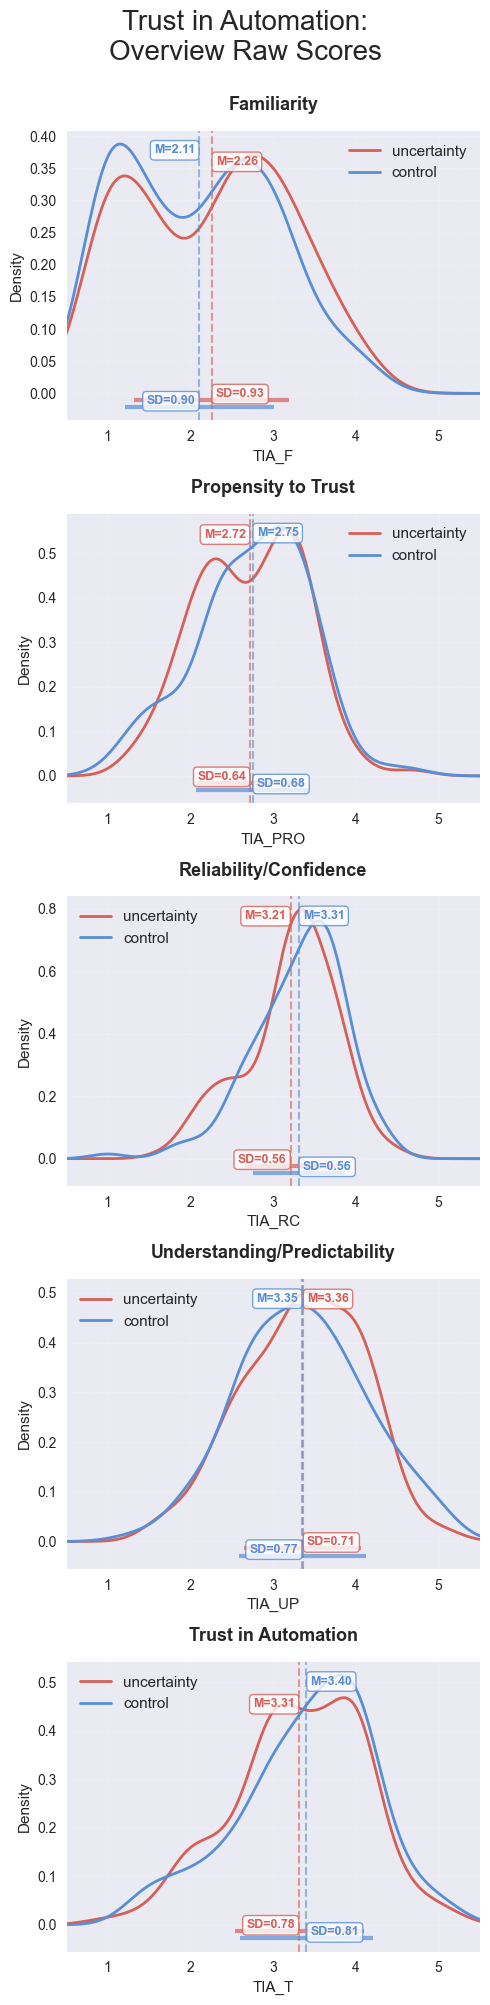

In [8]:
# Outcome variables
tia_scales = ['tia_f', 'tia_pro', 'tia_rc', 'tia_up', 'tia_t']

fig, axes = create_figure_grid(len(tia_scales), ncols=1, figsize=(5, 20))

for idx, scale in enumerate(tia_scales):
    plot_likert_distribution(data, scale,
                             title=scale_titles.get(scale)[6:],
                             group_by='stimulus_group', ax=axes[idx],
                             show_kde=True,
                             show_bars=False,
                             show_stats=False,
                             show_correlation=False)

fig.suptitle("Trust in Automation:\nOverview Raw Scores", fontsize=20, y=1)
plt.tight_layout()
plt.savefig('../plots/overview/tia_raw_overview.png', transparent=True)
plt.show()

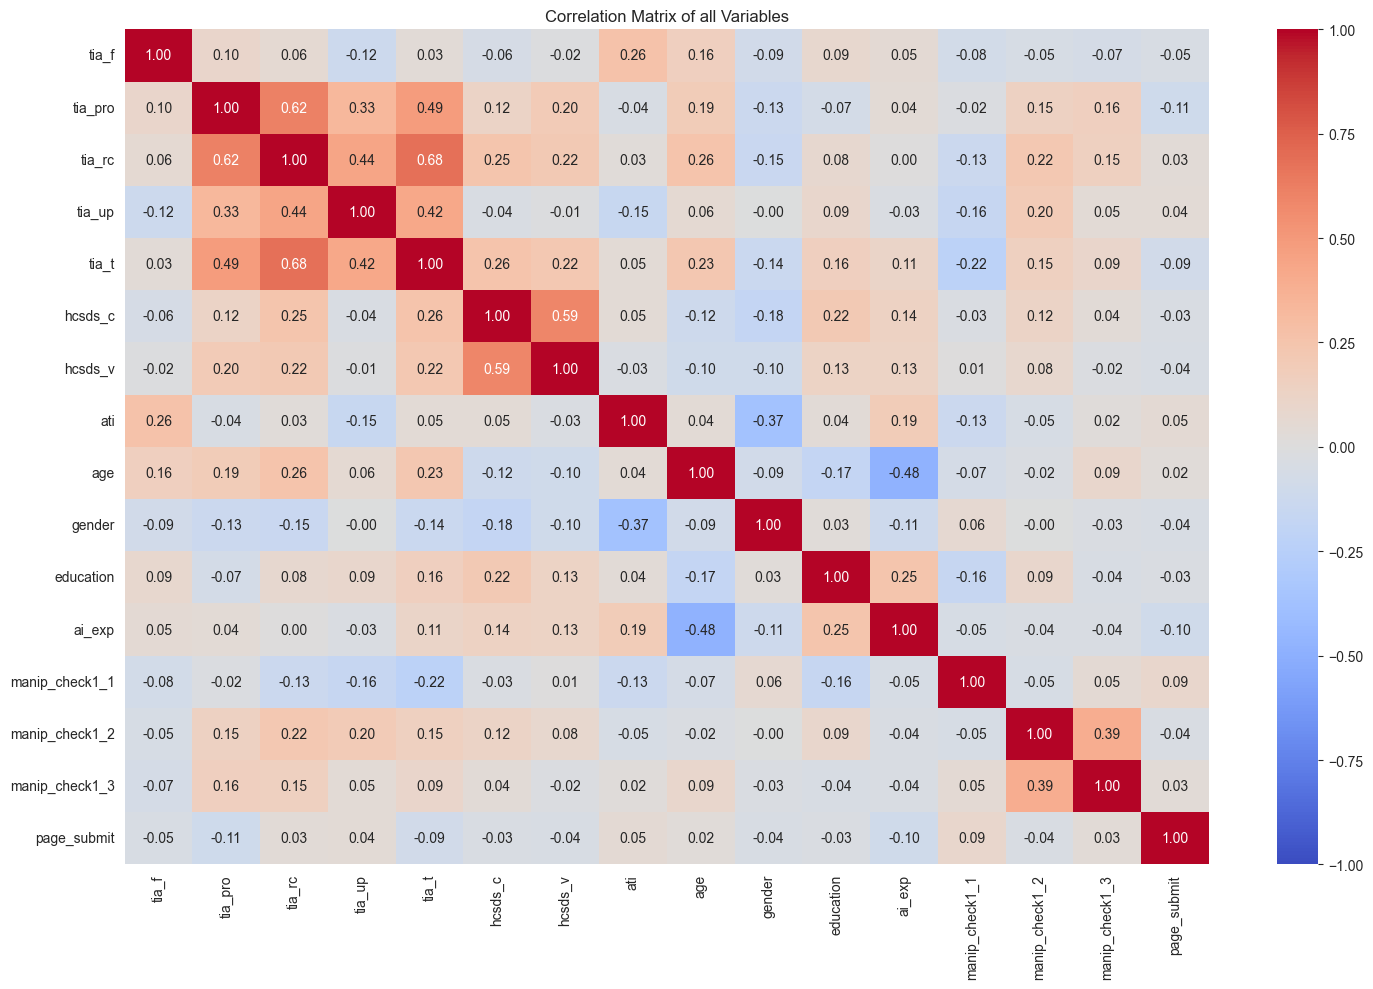

In [9]:
# cross correlation between all variables
import processing.scales as s

scales = s.tia_scales + s.hcsds_scales + s.ati_scales + ['age', 'gender', 'education', 'ai_exp'] + s.manip_check_scales[:-1] + ['page_submit']

corr_matrix = data[scales].corr()

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of all Variables')
plt.tight_layout()
plt.savefig(f'../plots/overview/corr_matrix.png', dpi=150, transparent=True)
plt.show()